In [82]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
f=open("subtitles/tt9900782_subtitle").read().lower()
(f.count("she")+f.count("her"))/(f.count("he")+f.count("him"))

0.24965986394557824

In [34]:
subtitles_data=pd.read_csv("OpenSubtitles_file_ids.csv")
subtitles_data.head()


ds= [i[:9] for i in os.listdir("subtitles")[1:]]
subtitles_data=subtitles_data[subtitles_data.imdb_id.isin(ids)]

subtitles_data.head()


,imdb_id,file_id,language,from_trusted,ai_translated,machine_translated
0,tt0493437,3755364.0,en,False,False,False
1,tt0829459,4592347.0,en,False,False,False
2,tt5684550,1174852.0,en,False,False,False
3,tt2302945,1001306.0,en,False,False,False
4,tt6517874,1214489.0,en,False,False,False


In [33]:
ids= [i[:9] for i in os.listdir("subtitles")[1:]]
subtitles_data=subtitles_data[subtitles_data.imdb_id.isin(ids)]

In [72]:
bias_score=[]
for imdb_id in subtitles_data.imdb_id:
    subtitles=open("subtitles/"+imdb_id+"_subtitle", encoding="utf-8").read().lower()
    he=subtitles.count(" he ")
    she=subtitles.count(" she ")
    him=subtitles.count(" him ")
    his=subtitles.count(" his ")
    her=subtitles.count(" her ")
    
    
    if he+him+his+she+her>0:
        bias_score.append((she+her)/(she+her+him+his+he))
    else:
        bias_score.append(np.nan)
    

In [73]:
subtitles_data["bias_score"]= bias_score

In [74]:
movies_data= pd.read_csv("indian movies.csv")
movies_data["Year"]= movies_data.Year.str.extract("(\d{4})").loc[:,0]
movies_data["Year"]=[float(i) for i in movies_data.Year]


data=subtitles_data.merge(movies_data, how="left", left_on="imdb_id", right_on="ID")
data=data[data.Year>=2000]
data=data[data.Language.isin(["hindi","tamil","telugu","malayalam","urdu","bengali","punjabi","oriya","kannada","nepali","marathi"])]
len(data)

3178

Text(0.5, 1.0, 'Female Pronoun Ratio')

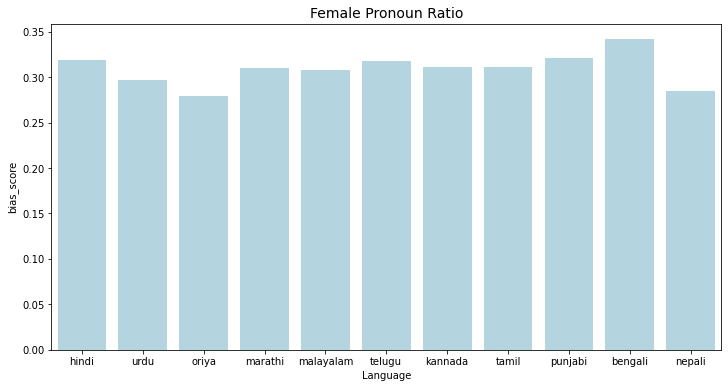

In [98]:
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(data=data, x="Language",y="bias_score", color="lightblue", ci=0)
plt.title("Female Pronoun Ratio", size=14)

Text(0.5, 1.0, 'Female Pronoun Ratio')

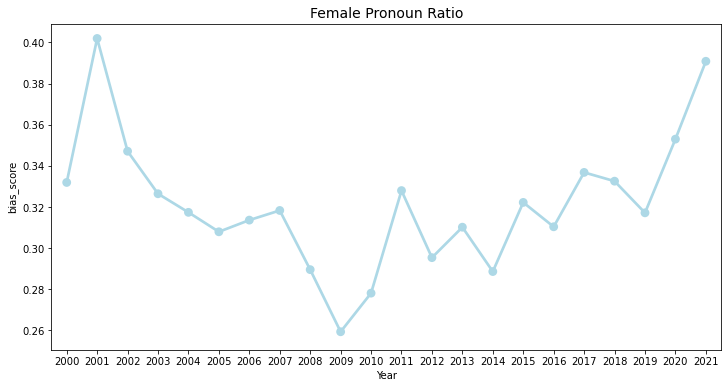

In [99]:
fig,ax=plt.subplots(figsize=(12,6))
sns.pointplot(data=data, x=data.Year.astype("int64"),y="bias_score", color="lightblue", ci=0)
plt.title("Female Pronoun Ratio", size=14)